# Capture

In [1]:
push!(LOAD_PATH,"../src/")
using CaptureRate 
using Plots
# contains functions for:
    # solving harmonic potential (calc_harm_wave_func) 
    # general polynomial potential (calc_poly_wave_func)
    # calculating phonon overlap (calc_overlap)
    # calculating capture coefficient (calc_capt_coeff)

# input for calc_harm_wave_func: calc_harm_wave_func(ħω1, ħω2, ΔQ, ΔE; Qi=-10, Qf=10, NQ=100, nev=20, nev2=Nothing)
    # ħω1, ħω2: the energies [eV] (frequency * hbar) of each of the potentials
    # ΔQ and ΔE are the horizontal (configuration coordinate [amu^(1/2)*Å]) and vertical (energetic [eV]) differences between potential minima
    # Qi and Qf [amu^(1/2)*Å] define the domain where potential will be solved (Q ∈ [`Qi`,`Qf`]), discretised in `NQ` steps
    # `nev` the number of first energy levels of 1D potentials to solve. 
    # You can also include an additional argument nev2 = XX to solve for a different number of states in the second potential (by default nev2 = nev)

# input for calc_poly_wave_func: calc_poly_wave_func(potential_matrix_1, potential_matrix_2, poly_order, Qi=-10, Qf=10, NQ=100, nev=10, nev2=Nothing)
    # potential_matrix_1 & potential_matrix_2: potentials from files (named Potential1.txt and Potential2.txt).
    # Each potential is read from a file with Q and E in columns 1 and 2 respectively (energy in eV and Q in amu^(1/2) Angstrom). 
    # poly_order: order of the polynomial that you'd like to use to fit your potential data
    # Qi and Qf [amu^(1/2)*Å] define the domain where potential will be solved (Q ∈ [`Qi`,`Qf`]), discretised in `NQ` steps for each potential. 
    # 
    # `nev` the number of first energy levels of 1D potentials to solve. 
    # You can also include an additional argument nev2 = XX to solve for a different number of states in the second potential (by default nev2 = nev)

# input for calc_overlap: calc_overlap!(cc::CC; plt=Nothing, cut_off=0.25, σ=0.025, lplot=false)
    # cut_off: energetic difference criteria for overlap of phonons (Δϵ < cut_off)
    # σ: amount of smearing of delta functions for determining phonon overlap

# input for calc_capt_coeff: calc_capt_coeff(W, V, T_range, cc::CC)
    # V: volume of supercell [Å³]
    # g: degeneracy (atomic configuration)
    # W: electron-phonon coupling matrix element [ev/(amu^(1/2)*Å)]
    # T: Temperature range for calculating capture coefficient [K]


┌ Info: Recompiling stale cache file /Users/samhood/.julia/compiled/v1.0/CaptureRate.ji for CaptureRate [top-level]
└ @ Base loading.jl:1184


# $\mathrm{GaAS}$

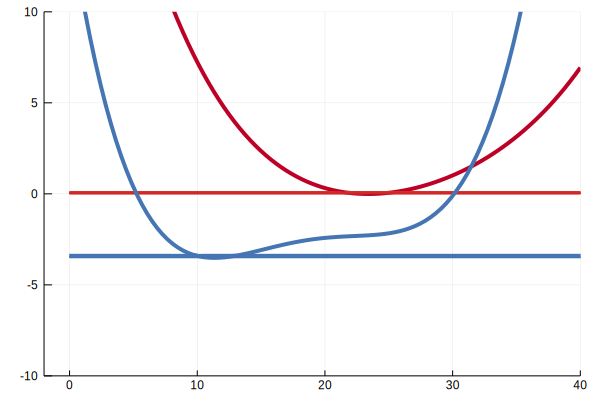

In [2]:
# Step 1: Fit polynomial to the potential energy data and solve potential

cc = CaptureRate.calc_poly_wave_func("Potential1.txt", "Potential2.txt", 4; Qi1=0, Qf1=40, NQ=100, nev=10)
CaptureRate.plot_potentials(cc)
ylims!(-10, 10)
xlims!(-2, 40)

# # Step 2: Calculate the overlap between the phonons in the potentials

CaptureRate.calc_overlap!(cc; cut_off=0.25, σ=0.01)
ylims!(-10, 10)
xlims!(-2, 40)

occupation(ϵ_max, T_max): 0.703727280846838


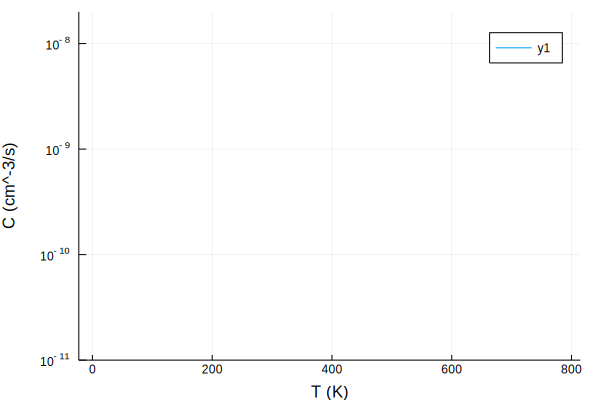

In [5]:
# Step 3: Calculate the capture coefficient over a given temperature range
T_range = 1:10:800
c = CaptureRate.calc_capt_coeff(6.4E-2, 1.1E-21, 4, T_range, cc)
plot(T_range, c*4*6) # degeneracy * Sommerfeld factor
yaxis!("C (cm^-3/s)",:log10)
xaxis!("T (K)")
ylims!(1E-11, 2E-8)